In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakshitha8843","key":"71217f6f913ceb892110027b68705e3b"}'}

In [2]:
! pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d emmarex/plantdisease

 99% 648M/658M [00:07<00:00, 96.1MB/s]
100% 658M/658M [00:07<00:00, 94.4MB/s]


In [6]:
!ls -lrth 

total 658M
drwxr-xr-x 1 root root 4.0K Mar 30 13:53 sample_data
-rw-r--r-- 1 root root   69 Apr  3 14:02 kaggle.json
-rw-r--r-- 1 root root 658M Apr  3 14:03 plantdisease.zip


In [7]:
!unzip plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [8]:
!ls -lrth PlantVillage/

total 2.0M
drwxr-xr-x 2 root root 104K Apr  3 14:03 Pepper__bell___Bacterial_spot
drwxr-xr-x 2 root root 140K Apr  3 14:03 Pepper__bell___healthy
drwxr-xr-x 2 root root  92K Apr  3 14:03 Potato___Early_blight
drwxr-xr-x 2 root root  96K Apr  3 14:03 Potato___Late_blight
drwxr-xr-x 2 root root  16K Apr  3 14:03 Potato___healthy
drwxr-xr-x 2 root root 212K Apr  3 14:03 Tomato_Bacterial_spot
drwxr-xr-x 2 root root 108K Apr  3 14:03 Tomato_Early_blight
drwxr-xr-x 2 root root 188K Apr  3 14:03 Tomato_Late_blight
drwxr-xr-x 2 root root  96K Apr  3 14:03 Tomato_Leaf_Mold
drwxr-xr-x 2 root root 176K Apr  3 14:03 Tomato_Septoria_leaf_spot
drwxr-xr-x 2 root root 176K Apr  3 14:03 Tomato_Spider_mites_Two_spotted_spider_mite
drwxr-xr-x 2 root root 136K Apr  3 14:03 Tomato__Target_Spot
drwxr-xr-x 2 root root 320K Apr  3 14:03 Tomato__Tomato_YellowLeaf__Curl_Virus
drwxr-xr-x 2 root root  36K Apr  3 14:03 Tomato__Tomato_mosaic_virus
drwxr-xr-x 2 root root 144K Apr  3 14:03 Tomato_healthy


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [10]:
imgs_path='PlantVillage/'
img_size=84
batch_size=64


In [11]:
class_names = os.listdir(imgs_path)
class_names

['Pepper__bell___Bacterial_spot',
 'Tomato__Tomato_mosaic_virus',
 'Pepper__bell___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Target_Spot',
 'Tomato_healthy',
 'Tomato_Bacterial_spot',
 'Potato___Early_blight',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Early_blight',
 'Potato___Late_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Late_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Potato___healthy']

In [12]:

def get_data(data_dir):
    img_data = [] 
    labels=[]
    for label in class_names: 
        path = os.path.join(data_dir, label)
        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                img_data.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(img_data),np.array(labels)

In [13]:
img_data,labels = get_data(imgs_path)
print(f'the shape of input image data is {img_data.shape}, labels shape is {labels.shape}')

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

the shape of input image data is (20638, 84, 84, 3), labels shape is (20638,)


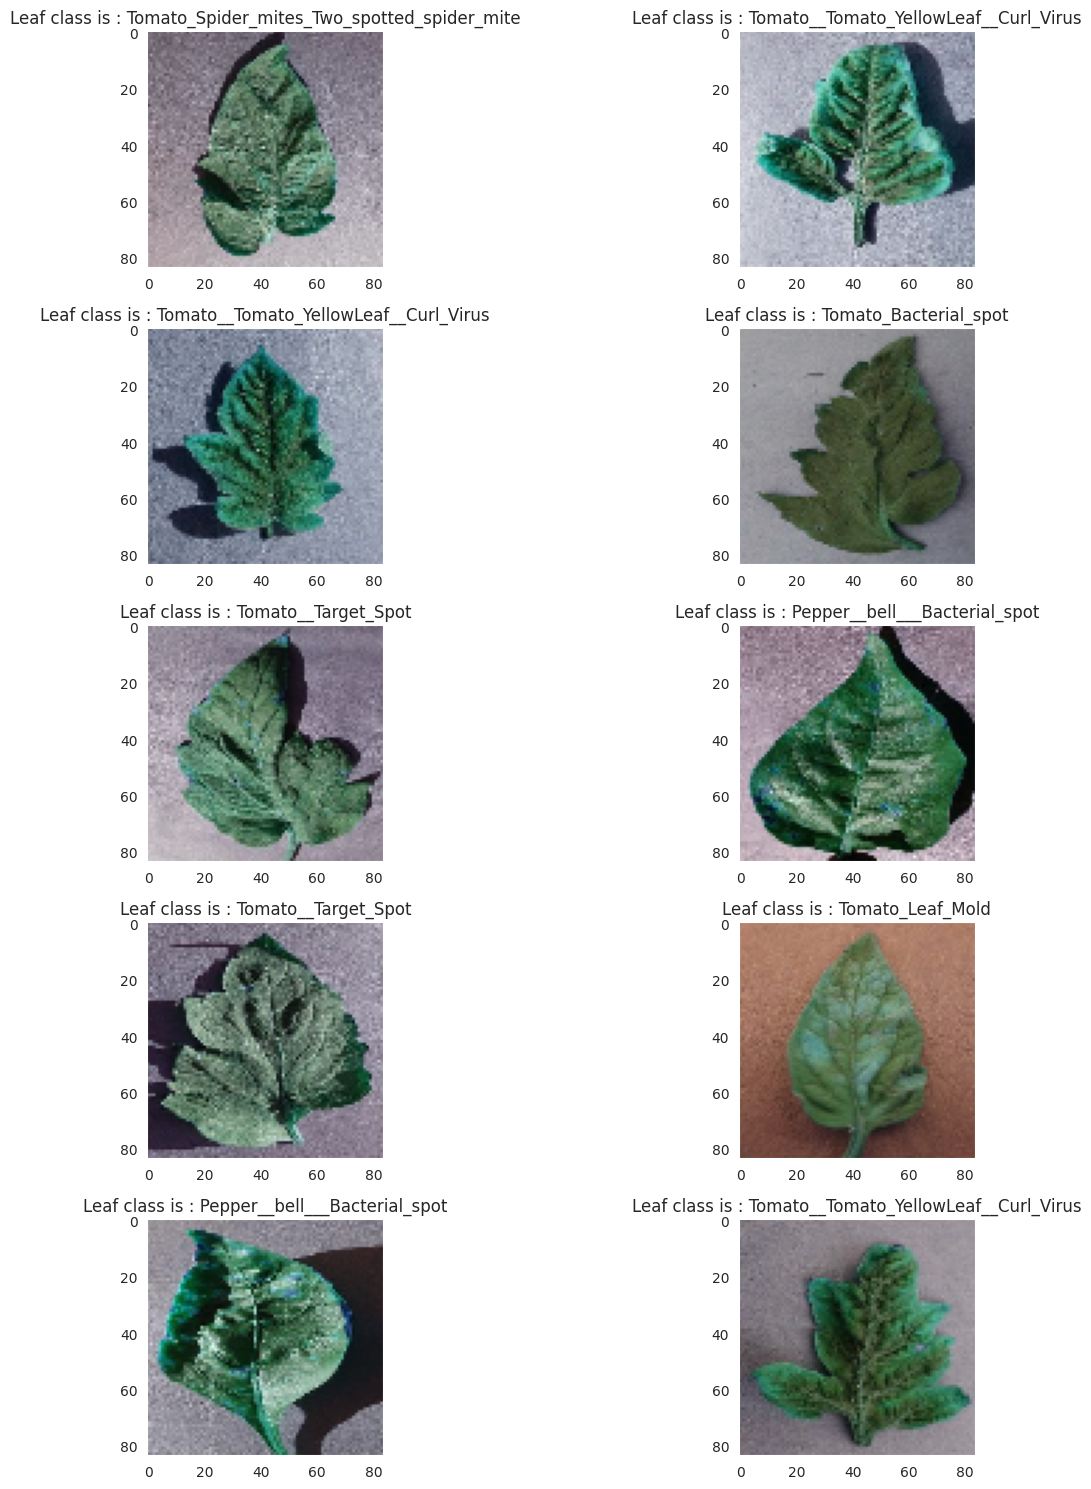

In [15]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(img_data))
        ax[i,j].imshow(img_data[l])
        ax[i,j].set_title('Leaf class is : '+str(class_names[labels[l]]))
        
plt.tight_layout()

In [16]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
img_data=preprocess_input(img_data)
img_data[0]

array([[[ 0.52156866,  0.38823533,  0.47450984],
        [ 0.5764706 ,  0.45882356,  0.52156866],
        [ 0.5921569 ,  0.48235297,  0.5294118 ],
        ...,
        [ 0.5372549 ,  0.4039216 ,  0.47450984],
        [ 0.5058824 ,  0.37254906,  0.4431373 ],
        [ 0.27843142,  0.13725495,  0.21568632]],

       [[ 0.5294118 ,  0.3803922 ,  0.45098042],
        [ 0.5686275 ,  0.43529415,  0.5058824 ],
        [ 0.54509807,  0.41960788,  0.48235297],
        ...,
        [ 0.37254906,  0.23921573,  0.30980396],
        [ 0.5058824 ,  0.37254906,  0.4431373 ],
        [ 0.4666667 ,  0.33333337,  0.4039216 ]],

       [[ 0.5921569 ,  0.4431373 ,  0.5137255 ],
        [ 0.5764706 ,  0.427451  ,  0.49803925],
        [ 0.60784316,  0.47450984,  0.54509807],
        ...,
        [ 0.48235297,  0.34901965,  0.41960788],
        [ 0.54509807,  0.41176474,  0.48235297],
        [ 0.64705884,  0.5137255 ,  0.58431375]],

       ...,

       [[ 0.16078436, -0.03529412,  0.04313731],
        [ 0

In [17]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.2,random_state=0,stratify=labels)
print(f'X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

X_train size is (16510, 84, 84, 3), X_test shape is (4128, 84, 84, 3)


In [19]:
del img_data,labels

**Implementing using VGG19**

In [20]:
from tensorflow.keras.layers import *

from tensorflow.keras.models import *

In [21]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(input_shape=(img_size,img_size,3), include_top=False, weights="imagenet")

for layer in vgg.layers[:19]:
        layer.trainable = False

model2=Sequential()
model2.add(vgg)
model2.add(MaxPool2D((2,2),strides=(2,2)))
model2.add(Flatten())
model2.add(Dense(len(class_names),activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 15)                7695      
                                                                 
Total params: 20,032,079
Trainable params: 4,727,311
Non-trainable params: 15,304,768
_________________________________________________________________


In [22]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=batch_size)

Epoch 1/10
258/258 [==============================] - 37s 91ms/step - loss: 0.7810 - accuracy: 0.7437 - val_loss: 0.4935 - val_accuracy: 0.8326
Epoch 2/10
258/258 [==============================] - 20s 77ms/step - loss: 0.3237 - accuracy: 0.8862 - val_loss: 0.3267 - val_accuracy: 0.8883
Epoch 3/10
258/258 [==============================] - 21s 80ms/step - loss: 0.2147 - accuracy: 0.9234 - val_loss: 0.2901 - val_accuracy: 0.9029
Epoch 4/10
258/258 [==============================] - 22s 84ms/step - loss: 0.1508 - accuracy: 0.9464 - val_loss: 0.2609 - val_accuracy: 0.9162
Epoch 5/10
258/258 [==============================] - 22s 86ms/step - loss: 0.1185 - accuracy: 0.9588 - val_loss: 0.3132 - val_accuracy: 0.9012
Epoch 6/10
258/258 [==============================] - 21s 83ms/step - loss: 0.0882 - accuracy: 0.9700 - val_loss: 0.3084 - val_accuracy: 0.9065
Epoch 7/10
258/258 [==============================] - 22s 87ms/step - loss: 0.0743 - accuracy: 0.9747 - val_loss: 0.3762 - val_accuracy:

Text(0.5, 1.0, 'val accuracy')

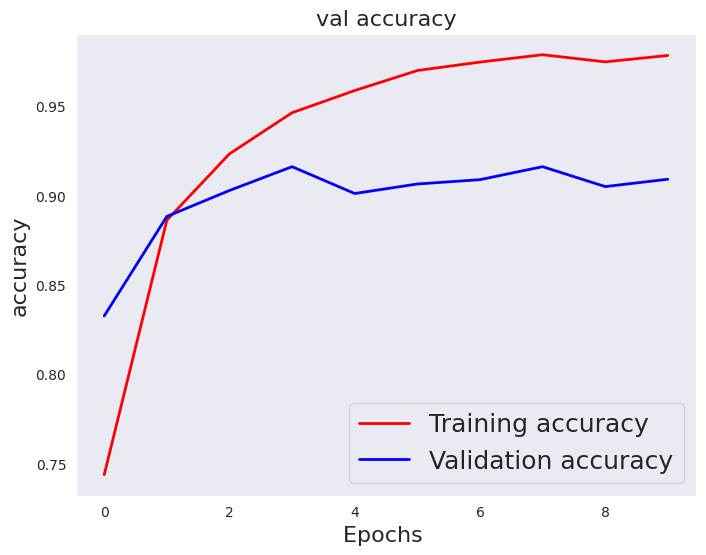

In [23]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [24]:
vgg_acc=model2.evaluate(X_test,y_test)
print('accuracy of the model is ',vgg_acc[1])

129/129 [==============================] - 4s 33ms/step - loss: 0.3449 - accuracy: 0.9092
accuracy of the model is  0.9091569781303406
